In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

import cv2

import matplotlib.pyplot as plt

from local_dataset import load_minst

In [2]:
img_size = 32

In [3]:
# (x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
x_train_org, y_train, x_test_org, y_test = load_minst(img_size)

No image flattening.
Label converted by One Hot Encoder.


In [4]:
print('y shape: ', y_train.shape)

y shape:  (60000, 10)


In [5]:
x_train_org.dtype

dtype('float32')

In [6]:
# x_train = x_train_org.astype('float32')
# x_test = x_test_org.astype('float32')

# x_train /= 255
# x_test /= 255


# y_train = keras.utils.to_categorical(y_train_org)
# y_test = keras.utils.to_categorical(y_test_org)


In [7]:
x_train_32 = x_train_org.reshape(-1, img_size, img_size, 1)
x_test_32 = x_test_org.reshape(-1, img_size, img_size, 1)

In [8]:
print('X shape: ', x_test_32.shape)
print('y shape: ', y_train.shape)

X shape:  (10000, 32, 32, 1)
y shape:  (60000, 10)


In [9]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Generate new dataset with Images size 28

In [10]:
img_size_new = 28

x_train_28 = [cv2.resize(img, dsize=(img_size_new, img_size_new)) for img in x_train_org]
x_test_28 = [cv2.resize(img, dsize=(img_size_new, img_size_new)) for img in x_test_org]

x_train_28 = np.reshape(x_train_28, [-1, img_size_new, img_size_new, 1])
x_test_28 = np.reshape(x_test_28, [-1, img_size_new, img_size_new, 1])

In [11]:
x_train_28 = x_train_28.astype('float32')
x_test_28 = x_test_28.astype('float32')

x_train_28 /= 255
x_test_28 /= 255

In [12]:
print('X train 28 shape: ', x_train_28.shape)
print('X test 28 shape: ',  x_test_28.shape)

X train 28 shape:  (60000, 28, 28, 1)
X test 28 shape:  (10000, 28, 28, 1)


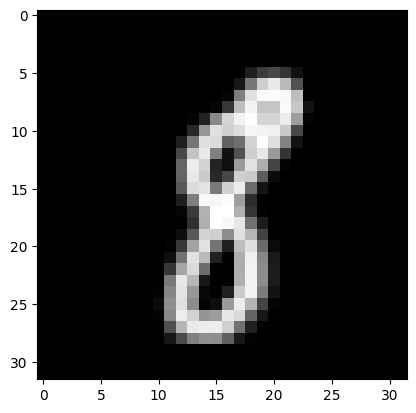

In [13]:
plt.imshow(x_train_32[300], cmap='gray')

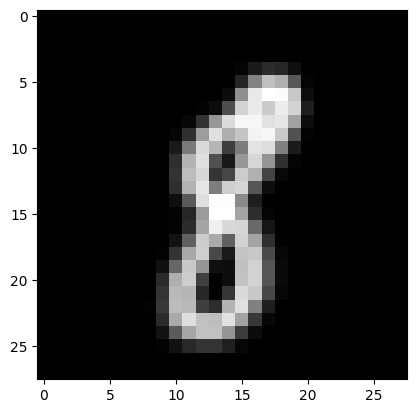

In [14]:
plt.imshow(x_train_28[300], cmap='gray')

## 1- Model with Flatten layer

In [15]:
# Build the model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,746 (659.16 KB)

 Trainable params: 168,746 (659.16 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Adam optimizer with learning rate of 0.001
adam_optimizer = Adam(learning_rate=0.001)

In [18]:
# Compile Model
model.compile(optimizer=adam_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
%%time
# Fit Model

history = model.fit(x=x_train_32,
                    y=y_train,
                    batch_size=256,
                    epochs=1,
                    validation_split=0.2
                    )


188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.5568 - loss: 1.2679 - val_accuracy: 0.9672 - val_loss: 0.1247
CPU times: total: 11.5 s
Wall time: 15.7 s


In [31]:
# model.save('models/model_basic_cnn.keras')
# model.save_weights('models/model_basic_cnn.weights.h5')

In [32]:
# temporary sotre model into a variable
# tmp_model = model

# load model:
# model = keras.models.load_model('./models/model_basic_cnn.keras')

In [21]:
# loss, accuracy = model.evaluate(X_test_s, y_test)
result = model.evaluate(x_test_32, y_test)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9622 - loss: 0.1407


[0.11909838765859604, 0.9679999947547913]

In [23]:
# Test the model with diffetent image size
# result = model.evaluate(x_test_28, y_test)
# result

## 2- Model with GPA layer (solution)

In [24]:
# Build the model

model_gpa = Sequential()
# Disregard input shape at first layer to make model tolerant against any shape of training data
model_gpa.add(Conv2D(32, (3, 3), activation='relu')) 
model_gpa.add(MaxPooling2D((2,2)))
model_gpa.add(Conv2D(64, (3, 3), activation='relu'))
model_gpa.add(Dropout(0.2))
model_gpa.add(MaxPooling2D((2,2)))

# Use global pooling layer to ake layer tolerant against any shape of test data
model_gpa.add(GlobalAveragePooling2D())

model_gpa.add(Dense(64, activation='relu'))
model_gpa.add(Dense(32, activation='relu'))
model_gpa.add(Dropout(0.5))
model_gpa.add(Dense(10, activation='softmax'))

In [25]:
model_gpa.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

--------
**To calculte the activation map, and parameter size of models without input shape, model shoule be traind or interfrer with data once**

In [26]:
model_gpa.predict(x_train_28[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


array([[0.09999273, 0.09999337, 0.09999859, 0.0999958 , 0.09998342,
        0.09999184, 0.10001954, 0.1000139 , 0.10001494, 0.09999591],
       [0.09999054, 0.099994  , 0.09999934, 0.09999547, 0.09998396,
        0.09999188, 0.10002051, 0.10001571, 0.10001376, 0.09999483],
       [0.0999954 , 0.09999727, 0.10000015, 0.0999966 , 0.09998819,
        0.09999298, 0.10001326, 0.10001026, 0.10001089, 0.09999494],
       [0.09999537, 0.09999653, 0.09999923, 0.09999742, 0.09999071,
        0.09999549, 0.10001136, 0.10000873, 0.10000795, 0.09999718],
       [0.0999929 , 0.09999532, 0.09999926, 0.09999571, 0.0999852 ,
        0.0999921 , 0.10001764, 0.10001297, 0.10001333, 0.09999561]],
      dtype=float32)

In [27]:
# Adam optimizer with learning rate of 0.001
adam_optimizer = Adam(learning_rate=0.001)

# Compile Model
model_gpa.compile(optimizer=adam_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
%%time
# Fit Model

history_gpa = model_gpa.fit(x=x_train_32,
                    y=y_train,
                    batch_size=256,
                    epochs=50,
                    validation_split=0.2
                    )


188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.2073 - loss: 2.1659 - val_accuracy: 0.6270 - val_loss: 1.3981
CPU times: total: 10.9 s
Wall time: 15.2 s


In [57]:
result_32 = model_gpa.evaluate(x_test_32, y_test)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5325 - loss: 1.4997


In [51]:
result_28 =  model_gpa.evaluate(x_test_28, y_test)
result_28

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1160 - loss: 2.9535


[2.969261407852173, 0.11349999904632568]

In [52]:
print('Max Acc: ', np.max(history.history['accuracy']) )
print('Max val Acc: ', np.max(history.history['val_accuracy']) )
print()
print('Max loss: ', np.min(history.history['loss']) )
print('Max val loss: ', np.min(history.history['val_loss']) )

Max Acc:  0.7361458539962769
Max val Acc:  0.9663333296775818

Max loss:  0.7904466390609741
Max val loss:  0.1378089189529419


In [53]:
history_gpa.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

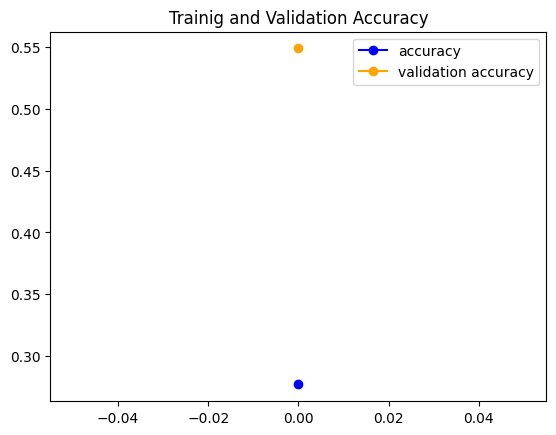

In [54]:
epochs = range(len(history_gpa.history['accuracy']))

plt.plot(epochs, history_gpa.history['accuracy'], marker='o', color='blue',label='accuracy')
plt.plot(epochs, history_gpa.history['val_accuracy'], marker='o' ,color='orange' ,label='validation accuracy')
plt.title('Trainig and Validation Accuracy')

plt.legend()

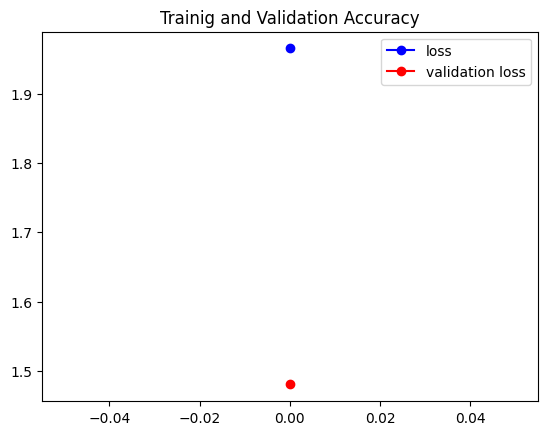

In [55]:
epochs = range(len(history_gpa.history['loss']))

plt.plot(epochs, history_gpa.history['loss'],  marker='o', color='blue',label='loss')
plt.plot(epochs, history_gpa.history['val_loss'],  marker='o', color='red',label='validation loss')
plt.title('Trainig and Validation Accuracy')

plt.legend()

In [ ]:
# model.save('./models/model_basic_cnn.keras')
# model.save_weights('./models/model_basic_cnn.weights.h5')